# GR5243 Group Project
##### Xingchen Ji, Yuting Wang, Hongyi Xu, and Jiacan Zhou

### Part 1. Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
eta = pd.read_csv("../Data/RTA.csv")

In [3]:
eta.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Part 2. Data Cleaning

##### (a) Invalid Variable Dropping

In [4]:
eta.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [5]:
eta.drop(["Service_year_of_vehicle", "Defect_of_vehicle", "Work_of_casuality", "Fitness_of_casuality"], axis = 1, inplace = True)
eta.drop(["Time", "Weather_conditions", "Casualty_class", "Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity"], axis = 1, inplace = True)

In [6]:
categorical = [col for col in eta.columns]
categorical.remove("Number_of_vehicles_involved")
categorical.remove("Number_of_casualties")
categorical.remove("Accident_severity")
numerical = ["Number_of_vehicles_involved", "Number_of_casualties"]

##### (b) Missing Data Cleaning

In [7]:
eta.dropna(subset = categorical, inplace = True)

### Part 3. Explanatory Data Analysis

##### (a) Descriptive Statistics

In [8]:
eta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 1 to 12315
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  8439 non-null   object
 1   Age_band_of_driver           8439 non-null   object
 2   Sex_of_driver                8439 non-null   object
 3   Educational_level            8439 non-null   object
 4   Vehicle_driver_relation      8439 non-null   object
 5   Driving_experience           8439 non-null   object
 6   Type_of_vehicle              8439 non-null   object
 7   Owner_of_vehicle             8439 non-null   object
 8   Area_accident_occured        8439 non-null   object
 9   Lanes_or_Medians             8439 non-null   object
 10  Road_allignment              8439 non-null   object
 11  Types_of_Junction            8439 non-null   object
 12  Road_surface_type            8439 non-null   object
 13  Road_surface_conditions      843

In [9]:
eta.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,8439.000000,8439.000000
mean,2.038038,1.547340
std,0.680789,1.014755
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


[Text(0.5, 1.0, 'Histogram of Accident Severity'),
 Text(0.5, 0, 'Accident Severity')]

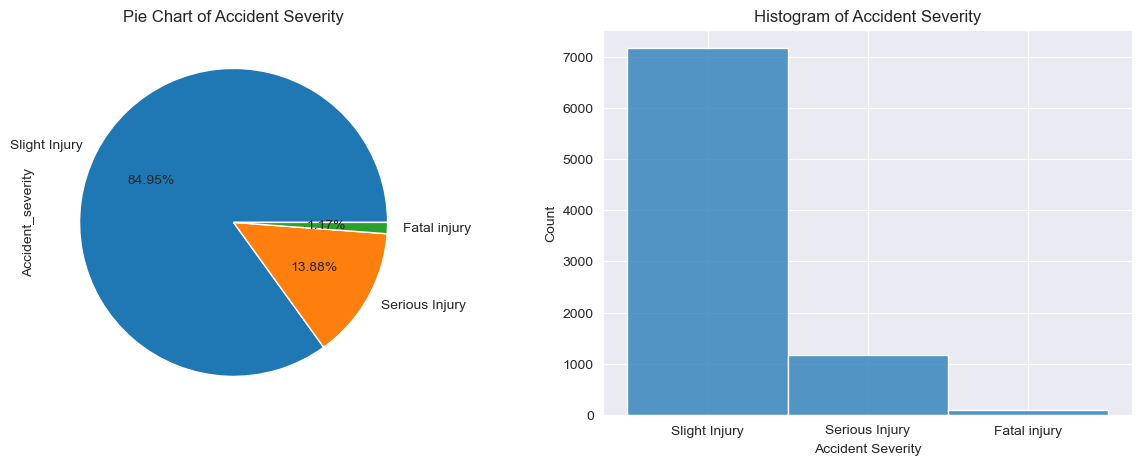

In [10]:
eta["Accident_severity"].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
eta["Accident_severity"].value_counts().plot.pie(ax = ax[0], autopct = "%.2f%%", title = "Pie Chart of Accident Severity")
sns.histplot(eta["Accident_severity"], ax = ax[1]).set(title = "Histogram of Accident Severity", xlabel = "Accident Severity")

##### (b) Data Visualization

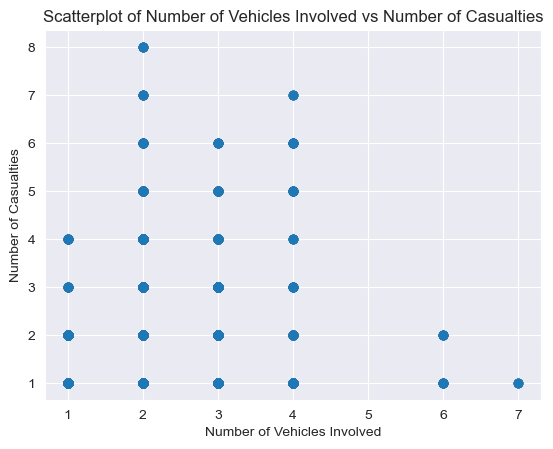

In [11]:
plt.scatter(x = "Number_of_vehicles_involved", y = "Number_of_casualties", data = eta)
plt.title("Scatterplot of Number of Vehicles Involved vs Number of Casualties")
plt.xlabel("Number of Vehicles Involved")
plt.ylabel("Number of Casualties");

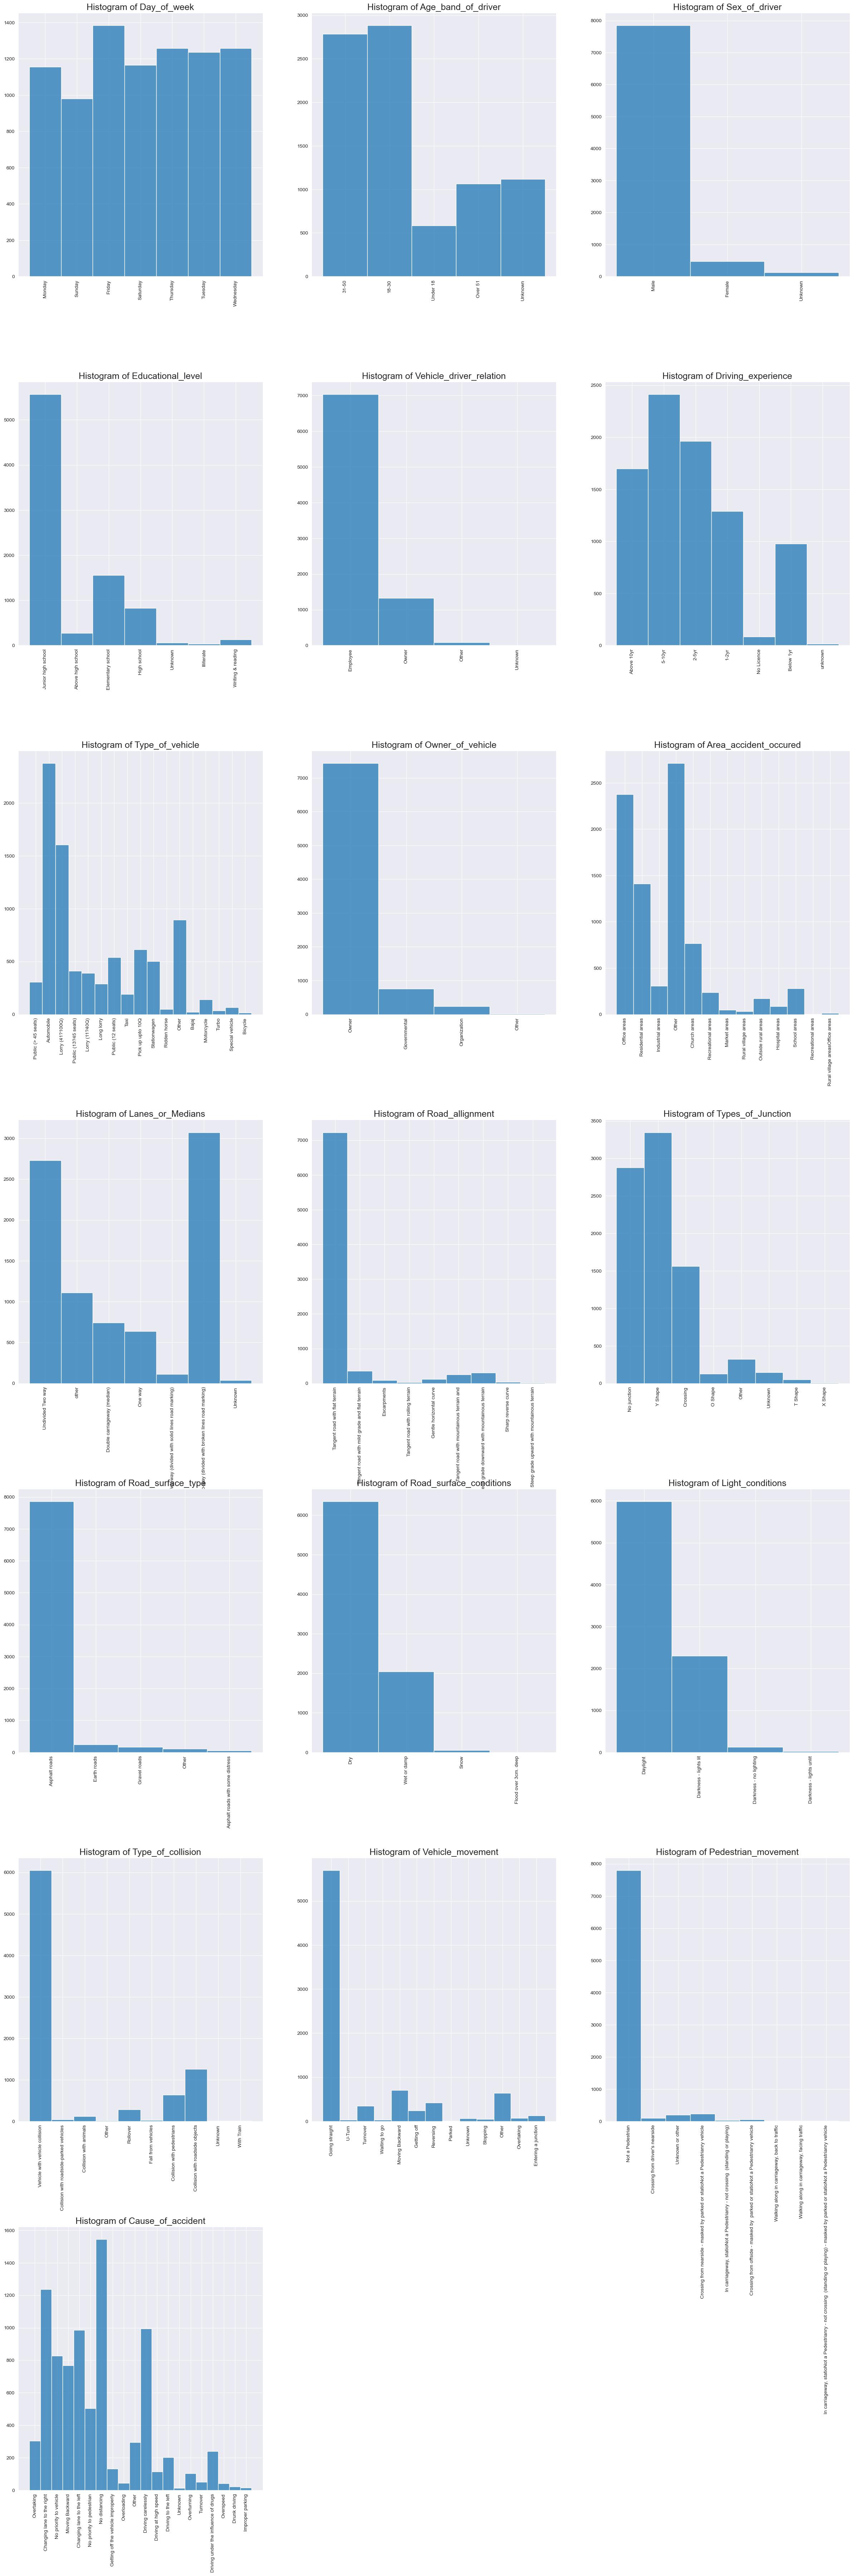

In [12]:
fig, ax = plt.subplots(7, 3, figsize = (30, 90))
for var, subplot in zip(categorical, ax.flatten()):
    sns.histplot(eta[var], ax = subplot).set(ylabel = "")
    subplot.set_title("Histogram of " + var, fontsize = 18)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
    if len(var) > 5:
        subplot.set_xlabel(var, fontsize = 6)
    else:
        subplot.set_xlabel(var, fontsize = 12)
    if subplot != ax[-1, -1]:
        subplot.set_xlabel("")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
fig.delaxes(ax[-1, -1])
fig.delaxes(ax[-1, -2])

##### (c) Correlation Analysis

C:\Users\26447\AppData\Local\Temp\ipykernel_17288\1030849446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = eta.corr()


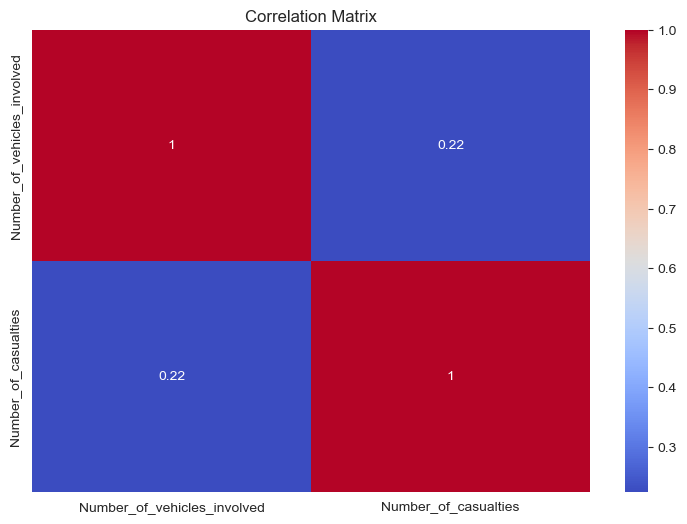

In [13]:
corr = eta.corr()
plt.figure(figsize = (9, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm").set(title = "Correlation Matrix");

### Part 4. Data Preprocessing

##### (a) Data Transformation

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
eta_fs = eta.copy()
eta_fs[numerical] = scaler.fit_transform(eta_fs[numerical])
y_cgan = eta_fs["Accident_severity"]

y_cgan = pd.get_dummies(y_cgan, columns = ["Accident_severity"])
y = y_cgan.to_numpy(dtype = np.float32)
X_cgan = pd.get_dummies(eta_fs, columns = categorical)
X_cgan = X_cgan.drop("Accident_severity", axis = 1)
X = X_cgan.to_numpy(dtype = np.float32)

##### (b) Data Augmentation by CGAN

In [15]:
from CGAN_on_Scratch import *
dataset = TensorDataset(torch.tensor(X, dtype = torch.float32), torch.tensor(y, dtype = torch.float32))
dataloader = DataLoader(dataset, batch_size = 512, shuffle = True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
noise_dim = 100
label_dim = y_cgan.shape[1]
input_dim = X_cgan.shape[1]
num_numerical = 2
num_categorical = 156
best_params = bayesian_optimization_cgan(dataloader, device, noise_dim, label_dim, num_numerical, num_categorical)
print(f"Best Parameters: {best_params}")

Best Parameters: {'num_epochs': 58, 'gen_hidden_dim': 352, 'disc_hidden_dim': 468, 'gen_lr': 1.0898174894595681e-05, 'disc_lr': 0.07078538113728512, 'gen_beta1': 0.1462486718136723, 'disc_beta1': 0.9248140932459514}


In [16]:
generator = Generator(noise_dim, label_dim, num_numerical, num_categorical, best_params["gen_hidden_dim"]).to(device)
discriminator = Discriminator(label_dim, num_numerical, num_categorical, best_params["disc_hidden_dim"]).to(device)
generator.apply(he_init)
discriminator.apply(he_init)
gen_optimizer = optim.Adam(generator.parameters(), lr = best_params["gen_lr"], betas = (best_params["gen_beta1"], 0.999))
disc_optimizer = optim.Adam(discriminator.parameters(), lr = best_params["disc_lr"], betas = (best_params["disc_beta1"], 0.999))
train_cgan(generator, discriminator, dataloader, device, gen_optimizer, disc_optimizer, best_params["num_epochs"], noise_dim)

0.0

In [17]:
def generate_slight_injury_data(generator, num_data, noise_dim, label_dim, device):
    noise = torch.randn(num_data, noise_dim).to(device)
    labels = torch.zeros(num_data, label_dim).to(device)
    labels[:, 2] = 1
    fake_data = generator(noise, labels)
    return fake_data.detach().cpu()

def generate_serious_injury_data(generator, num_data, noise_dim, label_dim, device):
    noise = torch.randn(num_data, noise_dim).to(device)
    labels = torch.zeros(num_data, label_dim).to(device)
    labels[:, 1] = 1
    fake_data = generator(noise, labels)
    return fake_data.detach().cpu()

def generate_fatal_injury_data(generator, num_data, noise_dim, label_dim, device):
    noise = torch.randn(num_data, noise_dim).to(device)
    labels = torch.zeros(num_data, label_dim).to(device)
    labels[:, 0] = 1
    fake_data = generator(noise, labels)
    return fake_data.detach().cpu()

def round_one_hot(encoded_data, num_categories):
    start_index = 0
    for cate in num_categories:
        current_data = encoded_data[:, start_index:start_index + cate]
        max_indices = torch.argmax(current_data, dim = 1, keepdim = True)
        one_hot = torch.zeros_like(encoded_data)
        one_hot.scatter_(1, max_indices, 1)
        encoded_data[:, start_index:start_index + cate] = one_hot[:, start_index:start_index + cate]
        start_index += cate
    return encoded_data

num_categories = [7, 5, 3, 7, 4, 7, 17, 4, 13, 7, 9, 8, 5, 4, 4, 10, 13, 9, 20]
fake1_data = generate_serious_injury_data(generator, 4000, noise_dim, label_dim, device)
fake1_numerical = fake1_data[:, :num_numerical]
fake1_categorical = fake1_data[:, num_numerical:]
fake1_categorical = round_one_hot(fake1_categorical, num_categories)
fake1_data = np.concatenate((fake1_numerical, fake1_categorical), axis = 1)
fake1_data = pd.DataFrame(fake1_data, columns = X_cgan.columns)

fake2_data = generate_fatal_injury_data(generator, 3000, noise_dim, label_dim, device)
fake2_numerical = fake2_data[:, :num_numerical]
fake2_categorical = fake2_data[:, num_numerical:]
fake2_categorical = round_one_hot(fake2_categorical, num_categories)
fake2_data = np.concatenate((fake2_numerical, fake2_categorical), axis = 1)
fake2_data = pd.DataFrame(fake2_data, columns = X_cgan.columns)

In [18]:
fake1_data.head()

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,-0.999999,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.999999,0.999999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
fake2_data.head()

,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_18-30,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0.999996,-0.999996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.999998,-0.999998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.999999,0.999999,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_aug = pd.concat([X_cgan, fake1_data, fake2_data], axis = 0).reset_index(drop = True)
y_fake = np.zeros((7000, 3))
y_fake[:4000, 1] = 1
y_fake[4000:, 0] = 1
y_fake = pd.DataFrame(y_fake, columns = y_cgan.columns)
y_aug = pd.concat([y_cgan, y_fake], axis = 0).reset_index(drop = True)

In [21]:
y_aug.value_counts()

Fatal injury  Serious Injury  Slight Injury
0.0           0.0             1.0              7169
              1.0             0.0              5171
1.0           0.0             0.0              3099
dtype: int64

##### (c) Dimensionality Reduction by PCA

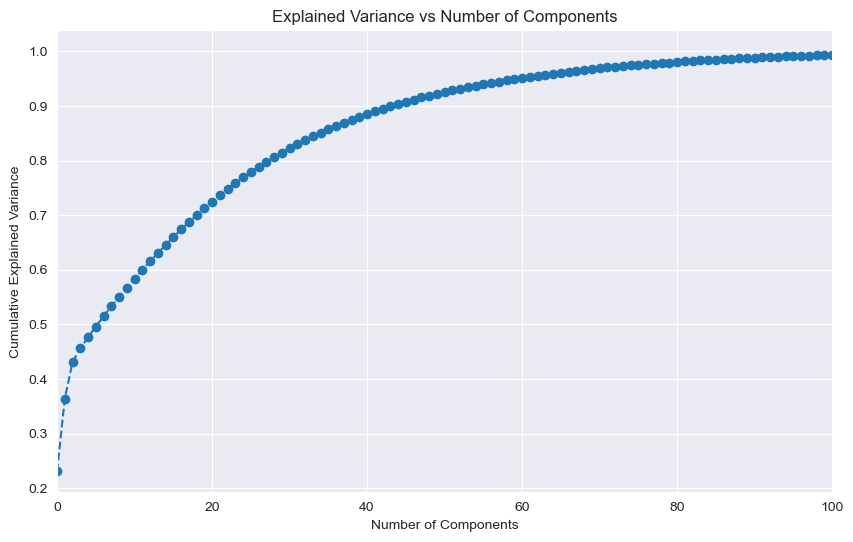

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_aug)
pca_data = pca.transform(X_aug)
pca_data_var = pca.explained_variance_ratio_
plt.figure(figsize = (10, 6))
plt.plot(np.cumsum(pca_data_var), marker = "o", linestyle = "--")
plt.xlabel("Number of Components")
plt.xlim(0, 100)
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.show();

In [23]:
threshold = 60
pca_denoise = PCA(n_components = threshold)
pca_denoise.fit(X_aug)
data_pca_denoised = pca_denoise.transform(X_aug)
X_denoised = pca_denoise.inverse_transform(data_pca_denoised)
X_denoised = pd.DataFrame(X_denoised, columns = X_aug.columns)

##### (d) Feature Selection by XGBoost

In [24]:
y_xg = y_aug.values
y_xg = np.argmax(y_xg, axis = 1)
y_xg = pd.Series(y_xg)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_denoised, y_xg, test_size = 0.3, random_state = 233)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.1, random_state = 233)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

feature_importance = xgb.feature_importances_
feature_importance = pd.DataFrame(feature_importance, index = X_train.columns, columns = ["importance"]).sort_values("importance", ascending = False)
aggregated_features = {}
variable_index = categorical + numerical
for feature in variable_index:
    for i in range(len(feature_importance.index)):
        if feature in feature_importance.index[i]:
            if feature in aggregated_features:
                aggregated_features[feature] += feature_importance.iloc[i, 0]
            else:
                aggregated_features[feature] = feature_importance.iloc[i, 0]
        else:
            if feature not in aggregated_features:
                aggregated_features[feature] = 0
aggregated_features = pd.DataFrame.from_dict(aggregated_features, orient = "index", columns = ["importance"]).sort_values("importance", ascending = False)
aggregated_features

,importance
Road_surface_type,0.377063
Cause_of_accident,0.077147
Type_of_vehicle,0.076289
Pedestrian_movement,0.062212
Area_accident_occured,0.051666
Vehicle_movement,0.046484
Type_of_collision,0.036136
Road_allignment,0.035385
Educational_level,0.032861
Types_of_Junction,0.027909


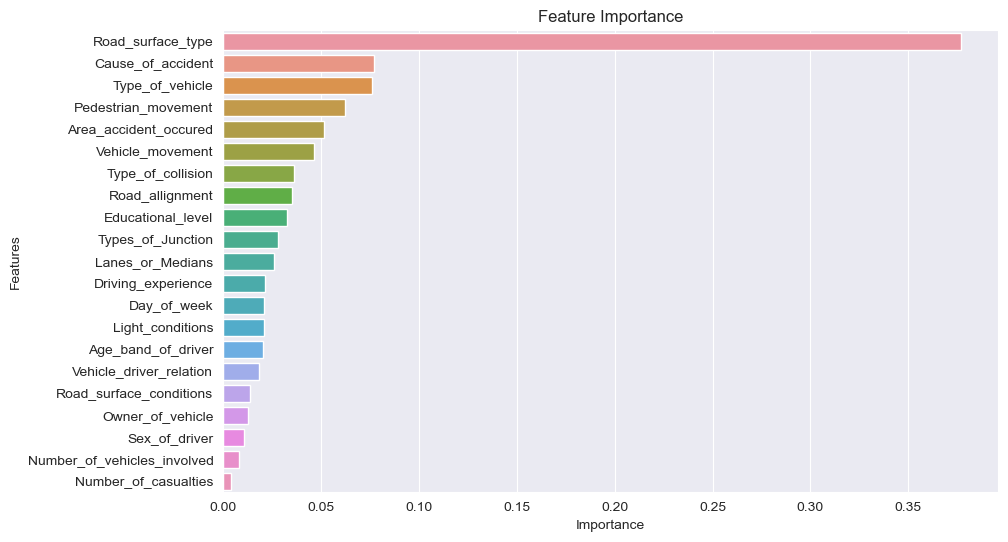

In [26]:
plt.figure(figsize = (10, 6))
sns.barplot(x = aggregated_features["importance"], y = aggregated_features.index).set(title = "Feature Importance", xlabel = "Importance", ylabel = "Features");

In [27]:
drop_features = aggregated_features[aggregated_features["importance"] < 0.01].index.tolist()
drop_list = []
for feature in drop_features:
    for i in range(len(X_denoised.columns)):
        if feature in X_denoised.columns[i]:
            drop_list.append(X_denoised.columns[i])
X_denoised.drop(drop_list, axis = 1, inplace = True)

### Part 5. Data Spliting

In [28]:
X_final = X_denoised.copy()
y_final = y_aug.copy()
y_final = y_final.values
y_final = np.argmax(y_final, axis = 1)
y_final = pd.Series(y_final)
X_final.to_csv("X_final.csv", index = False)
y_final.to_csv("y_final.csv", index = False)

In [29]:
X = pd.read_csv("X_final.csv")
y = pd.read_csv("y_final.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 233)

### Part 6. Model Selection
#### (a) SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
param_svc = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["rbf", "linear", "poly"], "degree": [1, 2, 3, 4]}
svc = GridSearchCV(SVC(), param_svc, refit = True, verbose = 0, n_jobs = 12)
svc.fit(X_train, y_train)
print(svc.best_params_)
print(svc.best_estimator_)
y_pred = svc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

#### (b) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_gbc = {"learning_rate": [0.1, 0.01, 0.001], "n_estimators": [100, 200, 300], "max_depth": [1, 2, 3, 4, 5]}
gbc = GridSearchCV(GradientBoostingClassifier(), param_gbc, refit = True, verbose = 0, n_jobs = 12)
gbc.fit(X_train, y_train)
print(gbc.best_params_)
print(gbc.best_estimator_)
y_pred = gbc.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

#### (c) Multilayer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
param_mlp = {"hidden_layer_sizes": [(128, 128), (128, 128, 128),(128, 128, 128, 128), (128, 128, 128, 128, 128)], "activation": ["relu", "logistic"], "solver": "adam", "alpha": [0.001, 0.01, 0.05, 0.1], "learning_rate": ["constant", "adaptive"]}
mlp = GridSearchCV(MLPClassifier(), param_mlp, refit = True, verbose = 0, n_jobs = 12)
mlp.fit(X_train, y_train)
print(mlp.best_params_)
print(mlp.best_estimator_)
y_pred = mlp.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", cbar = False, xticklabels = ["Fatal", "Serious", "Slight"], yticklabels = ["Fatal", "Serious", "Slight"])
plt.xlabel("True label")
plt.ylabel("Predicted label");

### Part 7. Model Evaluation

In [ ]:
models = pd.DataFrame({
    "Model": ["Support Vector Machine", "Gradient Boosting", "Multilayer Perceptron"],
    "Accuracy": [accuracy_score(y_test, svc.predict(X_test)), accuracy_score(y_test, gbc.predict(X_test)), accuracy_score(y_test, mlp.predict(X_test))]})
models.sort_values(by = "Accuracy", ascending = False)

In [ ]:
ax = sns.barplot(x = "Model", y = "Accuracy", data = models.sort_values(by = "Accuracy", ascending = False))
for acc in ax.containers:
    ax.bar_label(acc, label_type = "center");